### MSc in AI - CE6002 - Overfitting and How to Prevent It 

### Name: Abhijit Sinha

### ID: 18195067

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Had to add this for removing the warning for LassoCV
import warnings
warnings.filterwarnings('ignore')

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

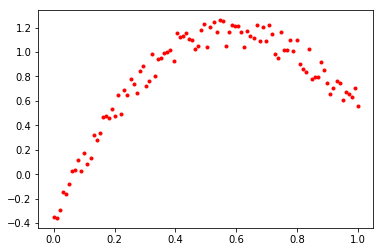

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

## Task 4 (CE6002)

### Task 4.1 
Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. 
- Pick at most 1000 values! Once you have found the optimal l, 
- compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [7]:
ein=[]
eout=[]
weights=[]

# Selecting 1000 values of lambda between [0,1]
# Thanks Martin Power for the suggestion to use logspace, rather than np.linspace/np.arrange
lambdas = np.logspace(-10, 0, num=1000)   # np.geomspace(0.0000001, 1, num=1000)
print('Number of lambda values:', len(lambdas))

X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

Number of lambda values: 1000


In [8]:
# Find the index with Minimum Eout
min_eout_idx = np.argmin(eout)

# Best lambda is at index with minimum out-sample error, Eout
min_eout_lambda = lambdas[min_eout_idx]

# Print the best/optimal lambda value
print('Best value of lambda       :',  min_eout_lambda)
print('Best lambda found at index :',  min_eout_idx)    

Best value of lambda       : 7.342870447166758e-05
Best lambda found at index : 586


#### Compare the Eout obtained with optimal l with the Eout obtained without regularization


In [9]:
# Calulate error with lambda 0; no regularization
w = weights_reg(X_train, y_train, 0)
eout_no_reg = calc_error(w, X_test, y_test)

print('Eout with regularization    :',  eout[min_eout_idx])
print('Eout without regularization :',  eout_no_reg)
print('Difference is error Eout <with/out regularization> :', eout_no_reg - eout[min_eout_idx])

Eout with regularization    : 0.07468922631224603
Eout without regularization : 3.7239435793092177
Difference is error Eout <with/out regularization> : 3.6492543529969717


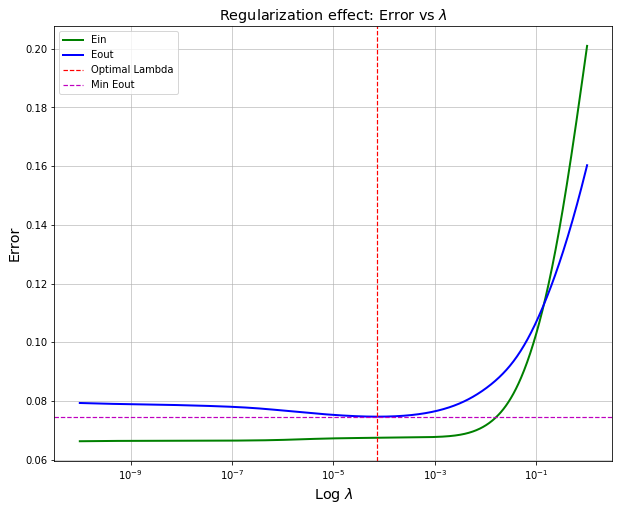

In [10]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(10,8))

# Plot Error for all the the 1000 lambda values
plt.plot(lambdas, ein, 'g-', label='Ein', lw=2)
plt.plot(lambdas, eout, 'b-', label='Eout', lw=2)

# Plot to identify the lambda with minimum Eout (axvline plot is inspired by Brian Parle)
plt.axvline(x=min_eout_lambda, label='Optimal Lambda', c='r', ls='--', lw=1.2)

# Identify the min Eout 
plt.axhline(eout[min_eout_idx], label='Min Eout', c='m', ls='--', lw=1.2)

plt.title('Regularization effect: Error vs $\lambda$', fontsize='x-large')
plt.xlabel('Log $\lambda$', fontsize='x-large')
plt.ylabel('Error', fontsize='x-large')

plt.xscale('log')  # enable this for better visualization
plt.grid(alpha=0.75)
plt.legend()
plt.show()

### Observations:
We can see the **the effect of regularization parameter lambda is very significant in getting a low out-sample error Eout.** There is a huge improvement in Eout while using regularization.

We get very low error with regularization while using optimal lambda value. Also, Ein and Eout sometimes cross each other.

### Task 4.2 Provide the following plots:

1. A plot showing the estimate of Eout vs l on the domain [0,1]
2. A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

### Plot showing the estimate of Eout vs l on the domain [0,1]

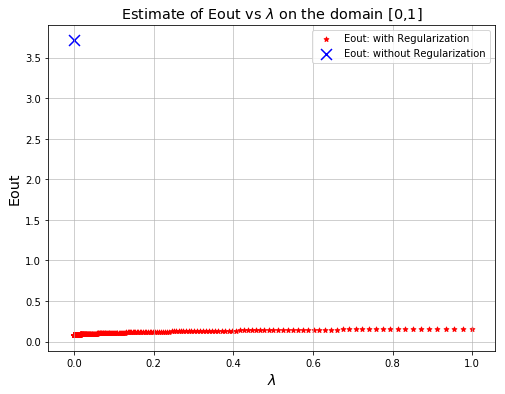

In [11]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(8,6))

# Plot for all 1000 values of lambdas
plt.scatter(lambdas, eout, color='r', marker='*', s=25, label='Eout: with Regularization')

# Eout with no regularization
plt.scatter(0, eout_no_reg, color='b', marker='x', s=120, label='Eout: without Regularization')

plt.title('Estimate of Eout vs $\lambda$ on the domain [0,1]', fontsize='x-large')
plt.xlabel('$\lambda$', fontsize='x-large')
plt.ylabel('Eout', fontsize='x-large')

plt.legend(loc='best')
plt.grid(alpha=0.75)
plt.show()

There is a very high Eout with no regularization at lambda=0 and low Eout with regularization

### Demonstrate 3 plots with overfitted model, a model with the optimal l, and an underfitted model

In [12]:
def run_experiment(X_trans, y, l):
    # Function to get predictions for different lambda values  
    weights=[]
    pred=[]
    
    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)

    # calculate the weights
    weights = weights_reg(X_train, y_train, l)

    # make predictions using linear regression using the weihts with regularization
    pred    = lin_reg(weights, X_trans)
    
    return pred

### Plotting the curves for over/optimal/under fitting
Three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model.

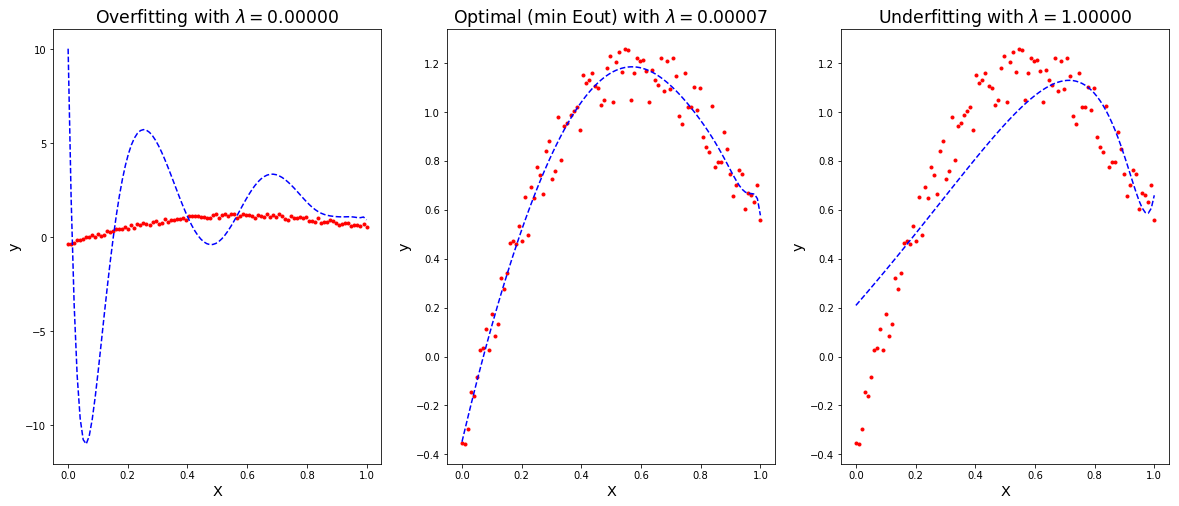

In [13]:
# Select the lambda value from Cross-Validation; best values of lambda(l) is used for the above tests
l = [0, min_eout_lambda, 1]
plot_label = ['Overfitting', 'Optimal (min Eout)', 'Underfitting']

fig = plt.figure(figsize=(20,8))

# Plot 3 plots for model with the overfitting, optimal l, and an underfitted model.
for idx, _ in enumerate(l):

    # find the predictions for the 3 lambda's
    y_pred = run_experiment(X_trans, y, l[idx])
            
    # Subplot the target function
    ax = fig.add_subplot(131+idx)

    # Plot the signal
    ax.plot(X, y, 'r.')

    # PLot the predictions based on lambda
    ax.plot(X, y_pred , 'b--')

    # Formating of the plot is inspired by Mark Murnane
    title = plot_label[idx] + ' with $\lambda = {:.5f}$'.format(l[idx])
    ax.set_title(title, fontsize='xx-large')
    ax.set_xlabel("X", fontsize='x-large')
    ax.set_ylabel("y", fontsize='x-large')

### Observation on the 3 plots:
There are a few conclusions we can draw from the above plots.

#### 1st plot: Over-fitting with Lambda=0
- The 1st plot is with lambda=0, no regularization, is clearly overfitting with 'wiggly' curve as the target function as is trying to map the noise in the dataset. Noise in this dataset is both stochastic(due to noise added in target y) and deterministic(as we use a very high 50th order polynomial as input X)

#### 2nd plot: Just-right with Optimal Lambda
- The 2nd plot is with the best value of lambda as the regularization parameter which was computed with the minimum Error for all 1000 values for lambdas. The curve is smooth and fits the data very well without getting affected by the noise in data.

#### 3rd plot: Under-fitting with Lambda=1
- The last plot is with a high value of lambda (1) as the regularization parameter. This has a strong effect on penalizing the weights and fails to map the target function well as we are restricting the model way too much.

## Task 5 (CE6002)
Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

### 10 Fold Cross-validation

In [14]:
# Perform K-Fold cross validation on varying lambdas
avg_eval=np.zeros(lambdas.shape[0])
folds=10

# Shuffle and Split data into training and validation data set for 10 fold cross-validation
# The shuffle will negate the effect of increase in order of X
kf = KFold(n_splits=folds, shuffle=True, random_state=5) 

# loop over K-Folds to find the best lambda with min Eval
for train_index, test_index in kf.split(X_trans):
    X_train, X_test = X_trans[train_index], X_trans[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    e_in=[]
    e_val=[]
    weights=[]
    # loop on lambda values
    for idx, l in enumerate(lambdas):    
        w = weights_reg(X_train, y_train, l)
        e_in.append(calc_error(w, X_train, y_train))
        temp_eval = calc_error(w ,X_test, y_test)
        e_val.append(temp_eval)
        weights.append(w)
        
        avg_eval[idx] += temp_eval
avg_eval = avg_eval / 10


In [15]:
# Find the best lambda value from cross-validation
eval_min_index = np.argmin(avg_eval)
eval_min       = avg_eval[eval_min_index]
cv_best_lambda = lambdas[eval_min_index]

print('Min Cross Validation Error = ', eval_min)
print('Optimal Lambda for CV = ', cv_best_lambda)

Min Cross Validation Error =  0.0735725478173461
Optimal Lambda for CV =  0.0010642092440647246


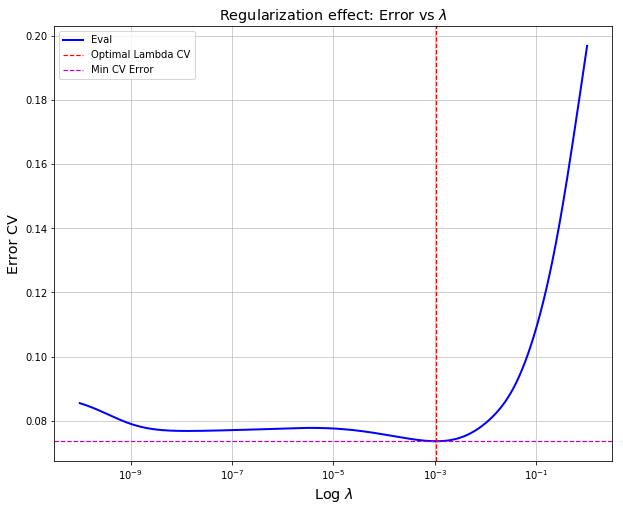

In [16]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(10,8))

# Plot Error for CV vs lambda values
plt.plot(lambdas, avg_eval, 'b-', label='Eval', lw=2)

# Plot to identify the lambda with minimum Eout (axvline plot is inspired by Brian Parle)
plt.axvline(cv_best_lambda, label='Optimal Lambda CV', c='r', ls='--', lw=1.2)

# Identify the min Eout from CV 
plt.axhline(eval_min, label='Min CV Error', c='m', ls='--', lw=1.2)

plt.title('Regularization effect: Error vs $\lambda$', fontsize='x-large')
plt.xlabel('Log $\lambda$', fontsize='x-large')
plt.ylabel('Error CV', fontsize='x-large')

plt.xscale('log')  # enable this for better visualization
plt.grid(alpha=0.75)
plt.legend()
plt.show()

### Plotting the curves for over/optimal[using KFold CV]/under fitting 

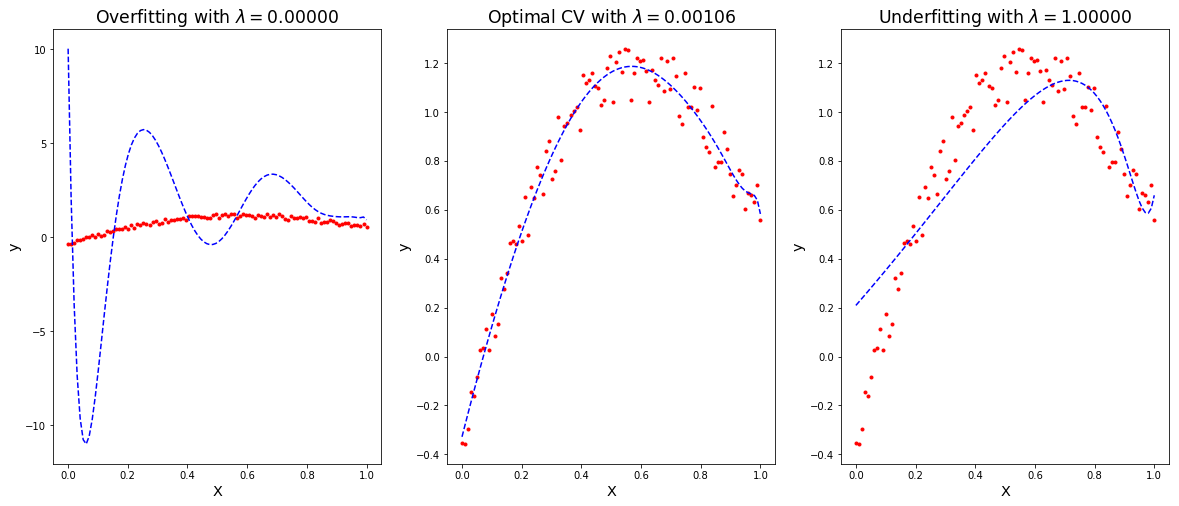

In [17]:
# Select the lambda value from Cross-Validation; best values of lambda(l) is used for the above tests
l_cv = [0, cv_best_lambda, 1]
plot_label_cv = ['Overfitting', 'Optimal CV', 'Underfitting']
fig = plt.figure(figsize=(20,8))

# Plot 3 plots for model with the overfitting, optimal l(from cross validation), and an underfitted model.
for idx, _ in enumerate(l_cv):

    # find the predictions for the 3 lambda's
    y_pred_cv = run_experiment(X_trans, y, l_cv[idx])
            
    # Subplot the target function
    ax = fig.add_subplot(131+idx)

    # Plot the signal
    ax.plot(X, y, 'r.')

    # PLot the predictions based on lambda
    ax.plot(X, y_pred_cv , 'b--')

    title = plot_label_cv[idx] + ' with $\lambda = {:.5f}$'.format(l_cv[idx])
    ax.set_title(title, fontsize='xx-large')
    ax.set_xlabel("X", fontsize='x-large')
    ax.set_ylabel("y", fontsize='x-large')

### Observations:

The lambda value after 10-Fold cross validation is 0.001 and lower in value as compared to the train-test split where we have lambda of 0.00007. (note these might chance if we re-run the notebook)

The 10 Fold cross validation is better than just train test split as we statistically use all the data for training and validation to get the best lambda. In train-test split, based on the split of train/test-size, we only train on a portion of data to get the best lambda, where as in 10 Fold, we do training and validation on 10 chunks of data and take the average effect to find the best hyperparameters.

## Task 6 (CE6002)
Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

- Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?


References: 
1. https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

### Ridge CV
Ridge CV performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients

In [18]:
def calc_RMSE(y, pred):
    # Function to calculate the Root Mean squared error
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(y))


Score : 0.9705700619042321

Best estimated regularization parameter, lambda/alpha : 0.005220567527846975

Eout on RidgeCV : 0.06996072161764787


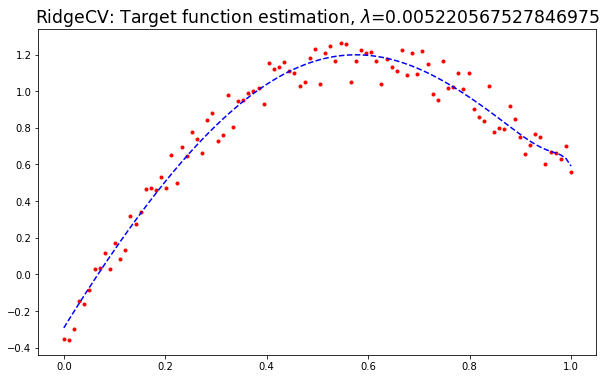

In [19]:
# Set the regularization parameters alpha
alpha_ridge = np.logspace(-10, 0, num=1000)
folds = 10

ridgeCV_clf = RidgeCV(alphas=alpha_ridge, cv=folds)
ridgeCV_clf.fit(X_trans, y)

ridgeCV_score = ridgeCV_clf.score(X_trans, y) 
y_pred_RCV = ridgeCV_clf.predict(X_trans)

# Calculate the Eout
ridge_eout = calc_RMSE(y, y_pred_RCV)

print("\nScore :", ridgeCV_score)
print("\nBest estimated regularization parameter, lambda/alpha :", ridgeCV_clf.alpha_)
print("\nEout on RidgeCV :", ridge_eout)

# Plotting the curves
plt.figure(figsize=(10,6))
plt.title('RidgeCV: Target function estimation, $\lambda$={}'.format(ridgeCV_clf.alpha_), fontsize='xx-large')
plt.plot(X, y, 'r.')
plt.plot(X, y_pred_RCV,'b--')
plt.show()

### Lasso CV
Lasso CV performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients.


Score : 0.9719127733667218

Best estimated regularization parameter, lambda/alpha : 2.1643890860640203e-05

Eout on LassoCV : 0.06834614685234366


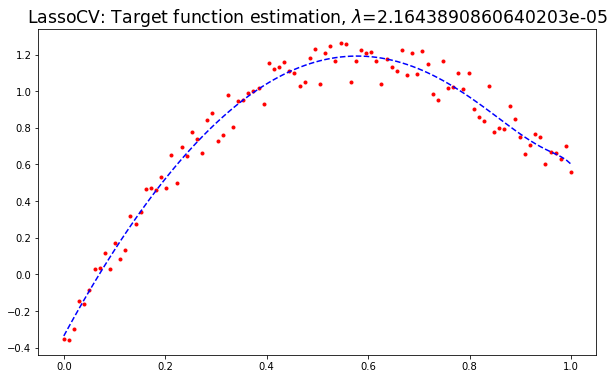

In [20]:
# Set the regularization parameters -> The grid of alphas used for fitting
alpha_lasso = np.logspace(-10, 0, num=1000)
folds = 10

lassoCV_clf = LassoCV(alphas=alpha_lasso, cv=folds, random_state=5, n_jobs=-2)
lassoCV_clf.fit(X_trans, y)

lassoCV_score = lassoCV_clf.score(X_trans, y) 
y_pred_LCV = lassoCV_clf.predict(X_trans)

# Calculate the Eout
lasso_eout = calc_RMSE(y, y_pred_LCV)

print("\nScore :", lassoCV_score)
print("\nBest estimated regularization parameter, lambda/alpha :", lassoCV_clf.alpha_)
print("\nEout on LassoCV :", lasso_eout)

# Plotting the curves
plt.figure(figsize=(10,6))
plt.title('LassoCV: Target function estimation, $\lambda$={}'.format(lassoCV_clf.alpha_), fontsize='xx-large')
plt.plot(X, y, 'r.')
plt.plot(X, y_pred_LCV, 'b--')
plt.show()

### Observe the resulting Eout, and lambda compare these to previous results

In [21]:
print('Ridge CV:               Eout {:.4f} for Lambda: {:.5f}'.format(ridge_eout, ridgeCV_clf.alpha_))
print('Lasso CV:               Eout {:.4f} for Lambda: {:.5f}'.format(lasso_eout, lassoCV_clf.alpha_))
print('KFold Cross Validation: Eval {:.4f} for Lambda: {:.5f}'.format(eval_min, cv_best_lambda))
print('With regularization:    Eout {:.4f} for Lambda: {:.5f}'.format(eout[min_eout_idx], min_eout_lambda))
print('Without regularization: Eout {:.4f} for Lambda: {}'.format(eout_no_reg, 0))

Ridge CV:               Eout 0.0700 for Lambda: 0.00522
Lasso CV:               Eout 0.0683 for Lambda: 0.00002
KFold Cross Validation: Eval 0.0736 for Lambda: 0.00106
With regularization:    Eout 0.0747 for Lambda: 0.00007
Without regularization: Eout 3.7239 for Lambda: 0


**Based on the Eout with corresponding lambda values below are the observations:** 
- Irrespective of what method we choose to select lambda, the Eout across different regularization methods is very low and have a very minor to difference. On the other hand if we don't use regularization there is a very high value of Eout which leads to overfitting.

- We also realised that, the regularization parameter lambda is a very important parameter and also seen the importance of cross-validation for finding best lambda value to counter over-fitting and achieve better Eout.

### Compare the weights obtained with RidgeCV to those obtained with LassoCV

In [22]:
print("\n***************  Weight vector(s) for Ridge CV  ***************\n")
print(ridgeCV_clf.coef_)

print("\n***************  Weight vector(s) for Lasso CV  ***************\n")
print(lassoCV_clf.coef_)


***************  Weight vector(s) for Ridge CV  ***************

[ 0.00000000e+00  4.48629119e+00 -2.07681046e+00 -1.79625458e+00
 -7.44870611e-01 -4.69657735e-02  2.75704551e-01  3.62062412e-01
  3.27204539e-01  2.43014303e-01  1.48996993e-01  6.44340452e-02
 -2.97082921e-03 -5.16859626e-02 -8.31813935e-02 -1.00156888e-01
 -1.05602449e-01 -1.02337351e-01 -9.28149844e-02 -7.90690390e-02
 -6.27299479e-02 -4.50720749e-02 -2.70704942e-02 -9.45669574e-03
  7.23160262e-03  2.26081964e-02  3.64037348e-02  4.84379516e-02
  5.85977968e-02  6.68204438e-02  7.30802248e-02  7.73786767e-02
  7.97370146e-02  8.01904806e-02  7.87841280e-02  7.55696937e-02
  7.06032943e-02  6.39437360e-02  5.56512849e-02  4.57867764e-02
  3.44109754e-02  2.15841202e-02  7.36560049e-03 -8.18626722e-03
 -2.50143943e-02 -4.30630233e-02 -6.22777957e-02 -8.26057931e-02
 -1.03995560e-01 -1.26397111e-01 -1.49761935e-01]

***************  Weight vector(s) for Lasso CV  ***************

[ 0.00000000e+00  5.07841725e+00 -3.80

We can see that the **Ridge CV has weights/coefficients very very small but they are non-zero** values. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity as it includes 50 features in the model. However, It is not very useful in case of where we have very high number of features(like in millions) as it will pose computational challenges with lot of weights.

**In the Lasso regression, the weights are mostly zeros** and tend to be a **sparse matrix of coefficients**. Along with shrinking coefficients, **lasso performs feature selection as well** as there are very few features used and some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model. 
The sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored and this will also reduce the VC dimension.
